In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
data=pd.read_csv("survey_results_public.csv")

C:\Users\Karan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [4]:
print("Total number of Datapoint-",data.shape[0])
print("Total number of feature-",data.shape[1])


Total number of Datapoint- 98855
Total number of feature- 129


In [5]:
print("Columns Name-")
data.columns.values

Columns Name-


array(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student',
       'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus',
       'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3',
       'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7',
       'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1',
       'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4',
       'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
       'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
       'AssessBenefits11', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities3',
       'JobContactPriorities4', 'JobContactPriorities5',
       'JobEmailPriorities1', 'JobEmailPriorities2',
       'JobEmailPriorities3', 'JobEmailPriorities4',
       'JobEmailPriorities5', 'JobEmailPriorities6',
       'JobE

In [10]:
data_schema=pd.read_csv("survey_results_schema.csv").set_index('Column')

# Missing Data in Responses

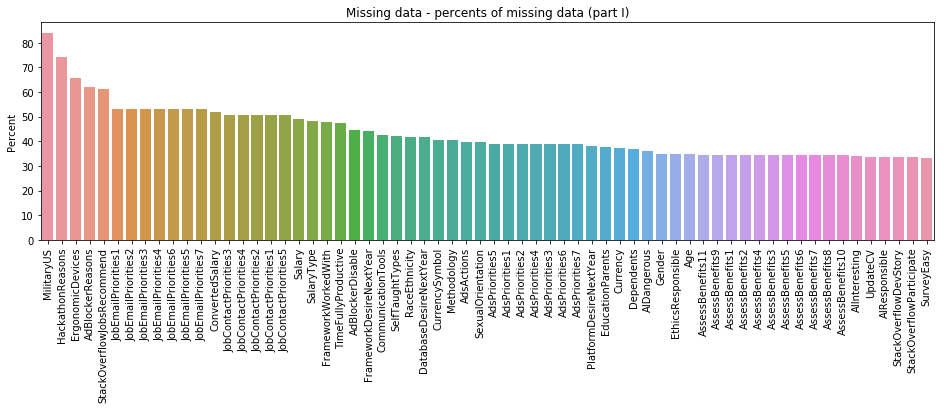

In [7]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
tmp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def plot_missing_data(start, end, text):
    tmp1 = tmp[start:end]
    plt.figure(figsize = (16,4))
    plt.title('Missing data - percents of missing data (part %s)' % text)
    s = sns.barplot(x=tmp1.index,y=tmp1['Percent'])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()    
    

plot_missing_data(1,65,"I")

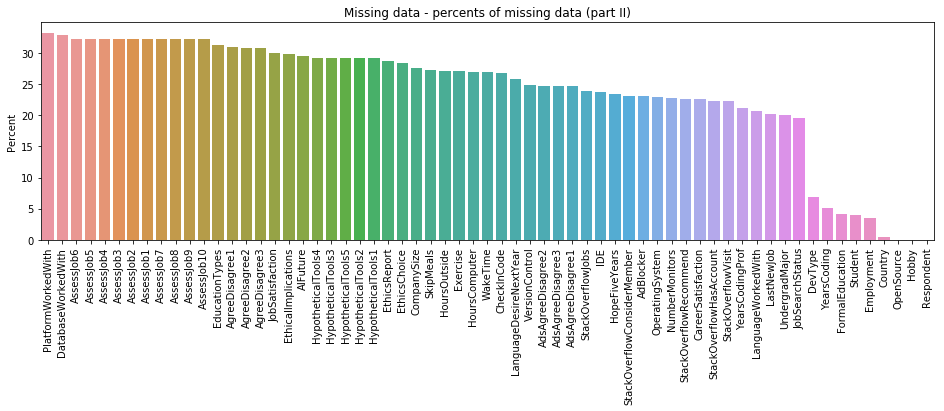

In [8]:
plot_missing_data(66,129,"II")

### As in the above data we can see there a lot of features on which we can perform EDA but as for learning perposes i will choose some of them such as:-


In [9]:
data=data[['Hobby', 'OpenSource', 'Country', 'Student',
       'Employment', 'FormalEducation', 'UndergradMajor', 
       'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction',  'UpdateCV', 'Currency', 'Salary',
       'SalaryType', 'ConvertedSalary', 'CurrencySymbol',
       'CommunicationTools', 'TimeFullyProductive', 'EducationTypes',
       'SelfTaughtTypes', 'TimeAfterBootcamp', 'HackathonReasons',
       'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear',
       'PlatformWorkedWith', 'PlatformDesireNextYear',
       'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE',
       'OperatingSystem', 'NumberMonitors', 'Methodology',
       'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting', 'AIResponsible', 'AIFuture',
       'EthicsChoice', 'EthicsReport', 'EthicsResponsible',
       'EthicalImplications', 'StackOverflowRecommend',
       'StackOverflowVisit', 'StackOverflowHasAccount',
       'StackOverflowParticipate', 'StackOverflowJobs',
       'StackOverflowDevStory', 'StackOverflowJobsRecommend',
       'StackOverflowConsiderMember', 'WakeTime', 'HoursComputer', 'HoursOutside',
       'SkipMeals', 'ErgonomicDevices', 'Exercise', 'Gender',
        'Age']]

In [10]:
print("Total number of Datapoint-",data.shape[0])
print("Total number of New feature-",data.shape[1])


Total number of Datapoint- 98855
Total number of New feature- 62


In [12]:
for column in data:
    print("\t\t\t\t\t\tColumn-",column)
    print(data[column].describe())    
    print("********************END********************")

						Column- Hobby
count     98855
unique        2
top         Yes
freq      79897
Name: Hobby, dtype: object
********************END********************
						Column- OpenSource
count     98855
unique        2
top          No
freq      55769
Name: OpenSource, dtype: object
********************END********************
						Column- Country
count             98443
unique              183
top       United States
freq              20309
Name: Country, dtype: object
********************END********************
						Column- Student
count     94901
unique        3
top          No
freq      70399
Name: Student, dtype: object
********************END********************
						Column- Employment
count                  95321
unique                     6
top       Employed full-time
freq                   70495
Name: Employment, dtype: object
********************END********************
						Column- FormalEducation
count                                        94703
unique                          

# Data analysis

## [1]Hobby

In [4]:
hobby=(data['Hobby'].value_counts())

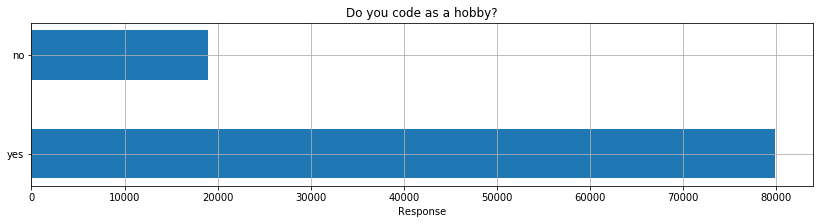

In [60]:
objects = ('yes', 'no')
#x_pos = np.arange(len(objects))
x_pos=[0,.1]
plt.figure(figsize=(14,3))
plt.barh(x_pos,hobby,.05,align='center' )
plt.grid()
plt.yticks(x_pos, objects)
plt.xlabel('Response')
plt.title(data_schema.loc['Hobby'].QuestionText)
 
plt.show()

In [61]:
print(x_pos)

[0, 0.1]


18958
